In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from econometron.utils.projection import Localprojirf


# ============================================================================
# 1. LOAD REAL FRED MACROECONOMIC DATA USED IN THE STATA DOCS
# ============================================================================



In [3]:
url = "https://www.stata-press.com/data/r19/usmacro.dta"
data = pd.read_stata(url)
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
# data = data.loc['1956-01-01':'2009-01-01']
# data = data.dropna()
# print(f"Number of observations after dropna: {len(data)}")  # Should be ~215-217

In [4]:
data=data.loc['1956-10-01':'2010-04-01']

In [ ]:
data

,fedfunds,inflation,ogap
date,,,
1956-10-01,2.93,2.580333,2.374612
1957-01-01,2.93,3.413998,2.393386
1957-04-01,3.00,3.609868,1.241970
1957-07-01,3.23,3.463045,1.137082
1957-10-01,3.25,3.085299,-1.286574
...,...,...,...
2009-04-01,0.18,-0.942293,-7.367530
2009-07-01,0.16,-1.606956,-7.439271
2009-10-01,0.12,1.487498,-6.894039


In [5]:
print(f"Original data shape: {data.shape}")
print(f"Date range: {data.index.min()} to {data.index.max()}")
print("\nData summary:")
print(data.describe())

Original data shape: (215, 3)
Date range: 1956-10-01 00:00:00 to 2010-04-01 00:00:00

Data summary:
         fedfunds   inflation        ogap
count  215.000000  215.000000  215.000000
mean     5.624233    3.988207   -0.669078
std      3.369136    2.859998    2.690014
min      0.120000   -1.606956   -8.063776
25%      3.255000    2.164846   -2.067973
50%      5.250000    3.273480   -0.644801
75%      7.220000    4.758453    0.845562
max     17.780000   14.425771    6.207540


# ============================================================================
# 2. VISUALIZE THE DATA
# ============================================================================


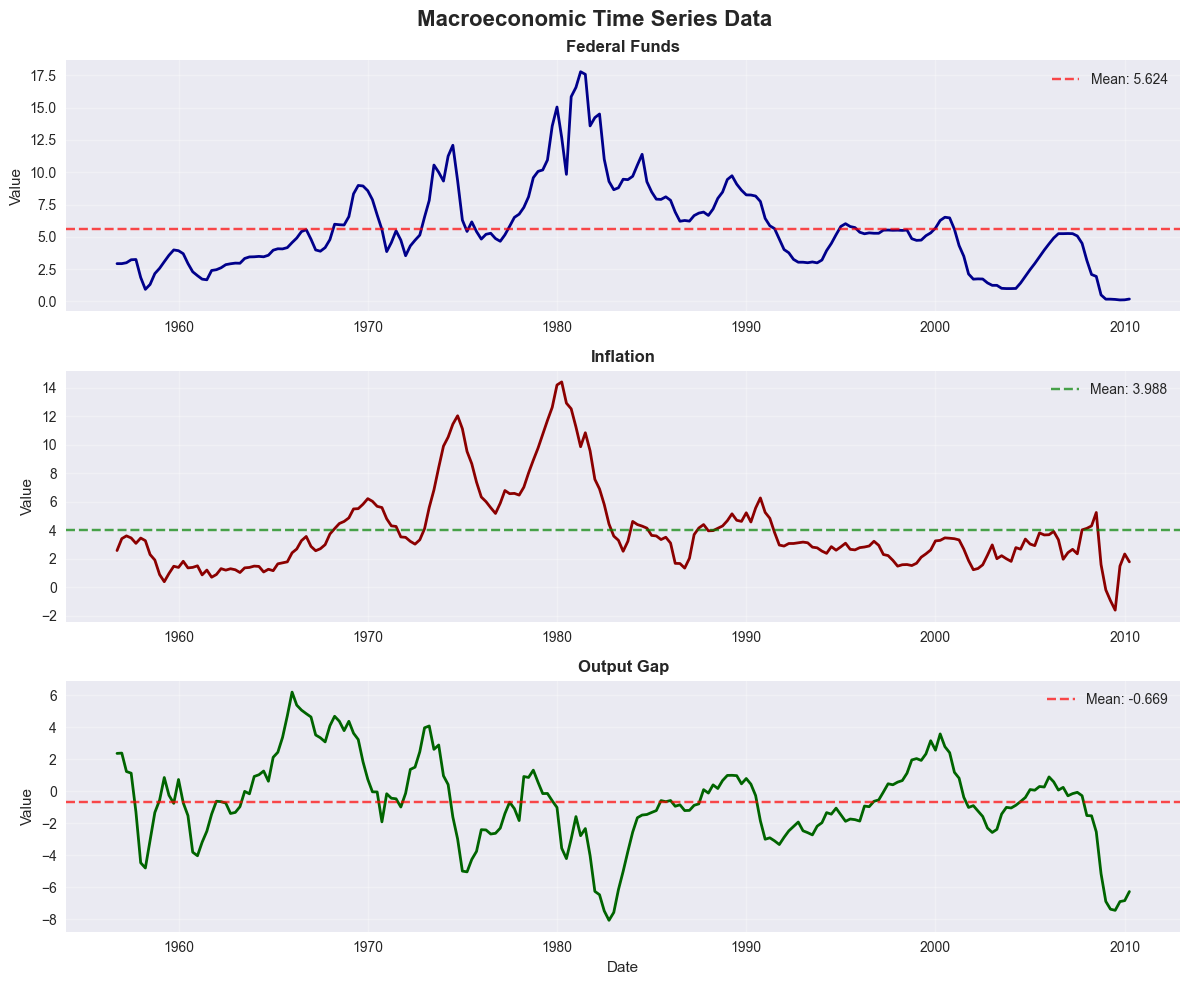

In [6]:

fig, axes = plt.subplots(3, 1, figsize=(12, 10))
fig.suptitle('Macroeconomic Time Series Data', fontsize=16, fontweight='bold')
#Fedfunds
axes[0].plot(data['fedfunds'], linewidth=2, color='darkblue')
axes[0].set_title('Federal Funds', fontweight='bold')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=data['fedfunds'].mean(), color='red', linestyle='--', alpha=0.7, label=f"Mean: {data['fedfunds'].mean():.3f}")
axes[0].legend()

# Inflation 
axes[1].plot(data['inflation'], linewidth=2, color='darkred')
axes[1].set_title('Inflation', fontweight='bold')
axes[1].set_ylabel('Value')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=data['inflation'].mean(), color='green', linestyle='--', alpha=0.7, label=f"Mean: {data['inflation'].mean():.3f}")
axes[1].legend()

# Output Gap 
axes[2].plot( data['ogap'], linewidth=2, color='darkgreen')
axes[2].set_title('Output Gap', fontweight='bold')
axes[2].set_ylabel('Value')
axes[2].set_xlabel('Date')
axes[2].grid(True, alpha=0.3)
axes[2].axhline(y=data['ogap'].mean(), color='red', linestyle='--', alpha=0.7, label=f"Mean: {data['ogap'].mean():.3f}")
axes[2].legend()

plt.tight_layout()
plt.show()


In [15]:
print("Sample data (first 10 and last 10 observations):")
print("First 10:")
print(data.head(10))
print("\nLast 10:")
print(data.tail(10))
print(f"\nTotal observations: {len(data)}")
print(f"Federal funds rate summary statistics:")
print(data['fedfunds'].describe())

print("\n" + "="*60)
print("EXAMPLE 1: UNIVARIATE LOCAL-PROJECTION MODEL")
print("="*60)
model = Localprojirf(
    data=data,
    endogenous_vars=['fedfunds','inflation'],
    exogenous_vars=['ogap'],
    max_horizon=4,  
    lags=[1,2,3,4],
    constant=True,
    date_col=None
)

model.fit()

model.get_summary()


Sample data (first 10 and last 10 observations):
First 10:
            fedfunds  inflation      ogap
date                                     
1956-10-01      2.93   2.580333  2.374612
1957-01-01      2.93   3.413998  2.393386
1957-04-01      3.00   3.609868  1.241970
1957-07-01      3.23   3.463045  1.137082
1957-10-01      3.25   3.085299 -1.286574
1958-01-01      1.86   3.456097 -4.466653
1958-04-01      0.94   3.273480 -4.792590
1958-07-01      1.32   2.299827 -3.067118
1958-10-01      2.16   1.911972 -1.321238
1959-01-01      2.57   0.890838 -0.544853

Last 10:
            fedfunds  inflation      ogap
date                                     
2008-01-01      3.18   4.137198 -1.512263
2008-04-01      2.09   4.310583 -1.527225
2008-07-01      1.94   5.252502 -2.532502
2008-10-01      0.51   1.595800 -5.146714
2009-01-01      0.18  -0.184236 -6.882240
2009-04-01      0.18  -0.942293 -7.367530
2009-07-01      0.16  -1.606956 -7.439271
2009-10-01      0.12   1.487498 -6.894039
2010-01